In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

## Feature Exploration

In [2]:
data=pd.read_csv("predictive_maintenance.csv")

In [3]:
data.head(10)

,UDI,Product_ID,Type,Air_temperature [K],Process_temperature [K],Rotational_speed [rpm],Torque [Nm],Tool_wear [min],Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [4]:
print("shape:",data.shape)

shape: (10000, 10)


In [5]:
print("Info: \n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product_ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air_temperature [K]      10000 non-null  float64
 4   Process_temperature [K]  10000 non-null  float64
 5   Rotational_speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool_wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure_Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
Info: 
 None


In [6]:
data.describe()

,UDI,Air_temperature [K],Process_temperature [K],Rotational_speed [rpm],Torque [Nm],Tool_wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
data.isnull().sum()

UDI                        0
Product_ID                 0
Type                       0
Air_temperature [K]        0
Process_temperature [K]    0
Rotational_speed [rpm]     0
Torque [Nm]                0
Tool_wear [min]            0
Target                     0
Failure_Type               0
dtype: int64

In [8]:
df2=data.drop(['UDI','Product_ID'],axis=1)

In [9]:
df2.head()

,Type,Air_temperature [K],Process_temperature [K],Rotational_speed [rpm],Torque [Nm],Tool_wear [min],Target,Failure_Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [10]:
df2["Air_temperature [K]"]=df2["Air_temperature [K]"]-272.15
df2["Process_temperature [K]"]=df2["Process_temperature [K]"]-272.15

df2.rename(columns={"Air_temperature [K]":"Air_temperature_[C]","Process_temperature [K]":"Process_temperature_[C]"},inplace=True)

In [11]:
df2.head()

,Type,Air_temperature_[C],Process_temperature_[C],Rotational_speed [rpm],Torque [Nm],Tool_wear [min],Target,Failure_Type
0,M,25.95,36.45,1551,42.8,0,0,No Failure
1,L,26.05,36.55,1408,46.3,3,0,No Failure
2,L,25.95,36.35,1498,49.4,5,0,No Failure
3,L,26.05,36.45,1433,39.5,7,0,No Failure
4,L,26.05,36.55,1408,40.0,9,0,No Failure


In [12]:
df2["Temperature_difference"]=df2["Process_temperature_[C]"]-df2["Air_temperature_[C]"]
df2["Rotational_speed"]=df2["Rotational_speed [rpm]"]
df2["Torque"]=df2["Torque [Nm]"]
df2["Tool_wear"]=df2["Tool_wear [min]"]
df3=df2.copy()
df3.head()

,Type,Air_temperature_[C],Process_temperature_[C],Rotational_speed [rpm],Torque [Nm],Tool_wear [min],Target,Failure_Type,Temperature_difference,Rotational_speed,Torque,Tool_wear
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5,1551,42.8,0
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5,1408,46.3,3
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4,1498,49.4,5
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4,1433,39.5,7
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5,1408,40.0,9


In [13]:
df3.drop("Rotational_speed [rpm]",axis=1,inplace=True)
df3.drop("Torque [Nm]",axis=1,inplace=True)
df3.drop("Tool_wear [min]",axis=1,inplace=True)
df3.head()

,Type,Air_temperature_[C],Process_temperature_[C],Target,Failure_Type,Temperature_difference,Rotational_speed,Torque,Tool_wear
0,M,25.95,36.45,0,No Failure,10.5,1551,42.8,0
1,L,26.05,36.55,0,No Failure,10.5,1408,46.3,3
2,L,25.95,36.35,0,No Failure,10.4,1498,49.4,5
3,L,26.05,36.45,0,No Failure,10.4,1433,39.5,7
4,L,26.05,36.55,0,No Failure,10.5,1408,40.0,9


Text(0, 0.5, 'Count')

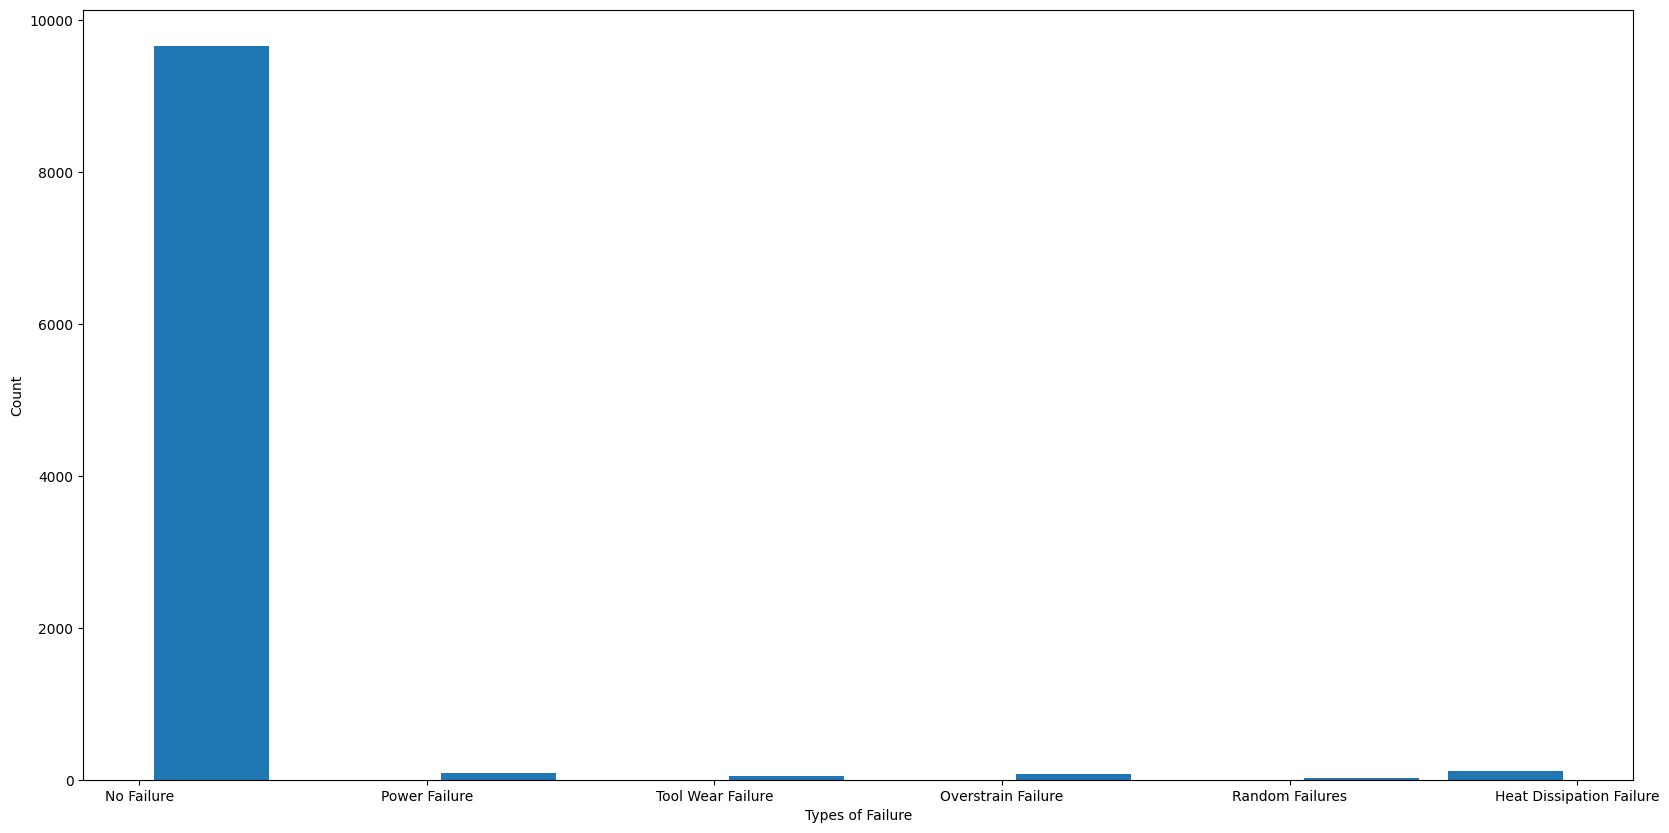

In [14]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df3.Failure_Type,rwidth=0.8)
plt.xlabel("Types of Failure")
plt.ylabel("Count")

In [15]:
df3.Failure_Type.unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

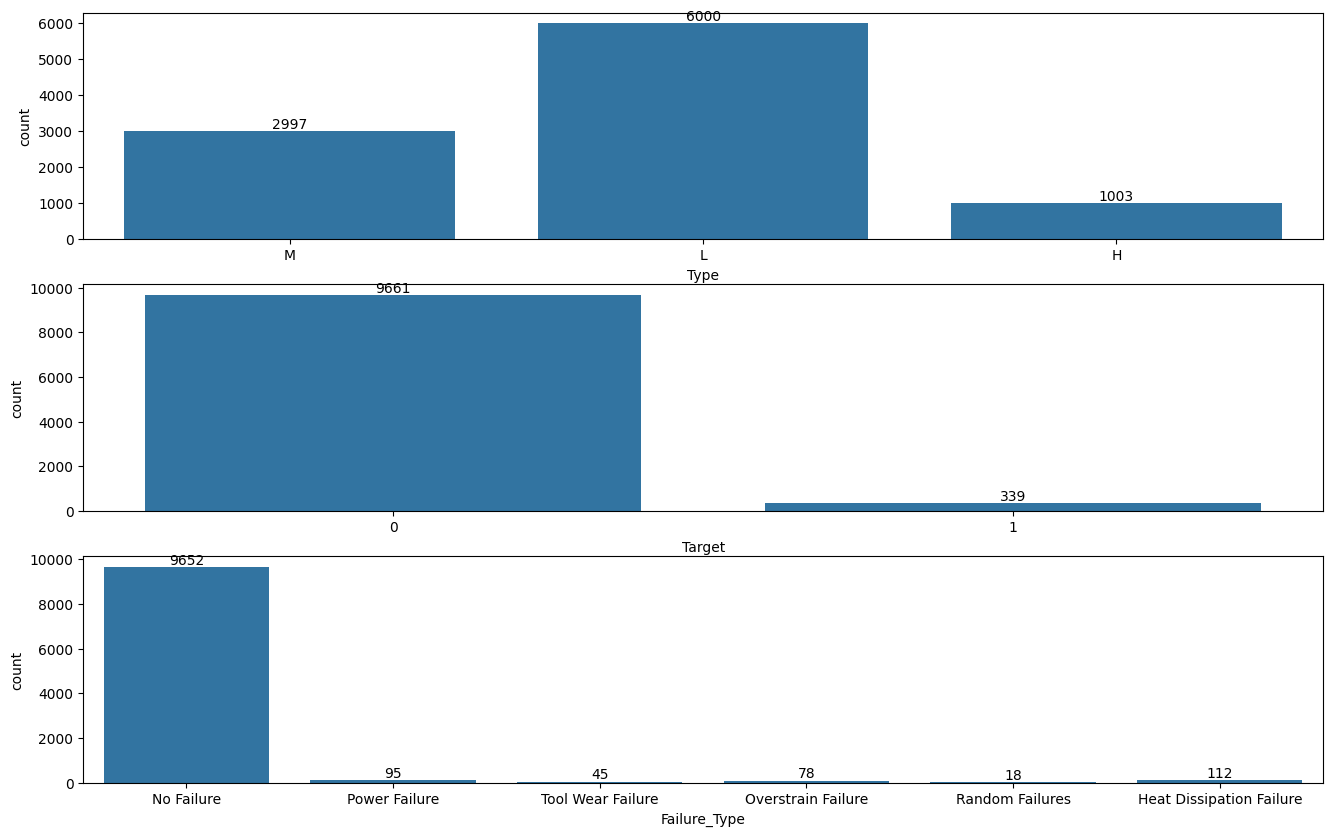

In [16]:
ax=plt.figure(figsize=(16,10))
for index,feature in enumerate(['Type','Target','Failure_Type']):
    ax=plt.subplot(3,1,1+index)
    ax=sns.countplot(data=df3,x=feature)
    ax.bar_label(ax.containers[0])
    plt.xticks()

In [17]:
df4=df3.drop(df3[((df3['Failure_Type']!='No Failure') & (df3['Target']==0)) | ((df3['Failure_Type'] =='No Failure') & (df3['Target']==1))].index)
df4.shape

(9973, 9)

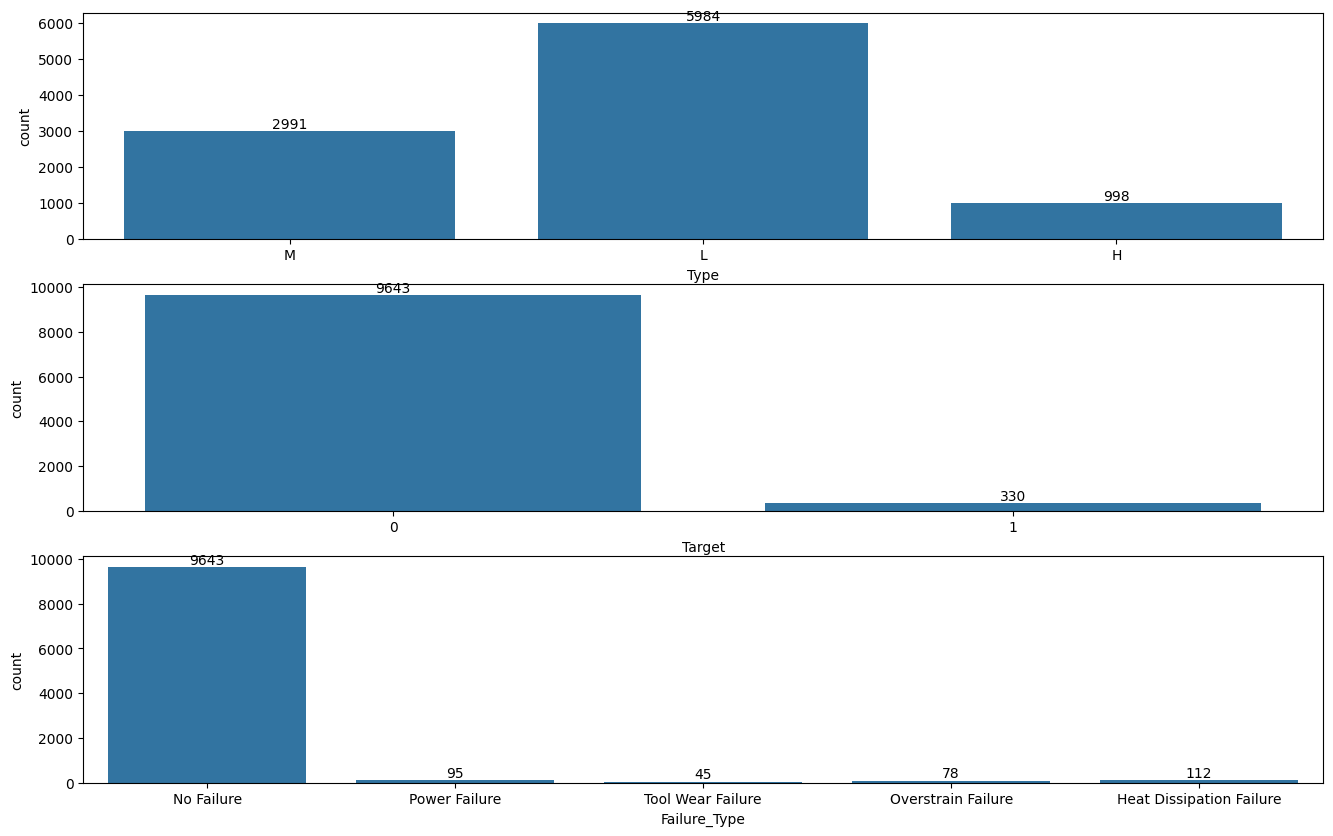

In [18]:
ax=plt.figure(figsize=(16,10))
for index,feature in enumerate(['Type','Target','Failure_Type']):
    ax=plt.subplot(3,1,1+index)
    ax=sns.countplot(data=df4,x=feature)
    ax.bar_label(ax.containers[0])
    plt.xticks()

In [19]:
df4.head()

,Type,Air_temperature_[C],Process_temperature_[C],Target,Failure_Type,Temperature_difference,Rotational_speed,Torque,Tool_wear
0,M,25.95,36.45,0,No Failure,10.5,1551,42.8,0
1,L,26.05,36.55,0,No Failure,10.5,1408,46.3,3
2,L,25.95,36.35,0,No Failure,10.4,1498,49.4,5
3,L,26.05,36.45,0,No Failure,10.4,1433,39.5,7
4,L,26.05,36.55,0,No Failure,10.5,1408,40.0,9


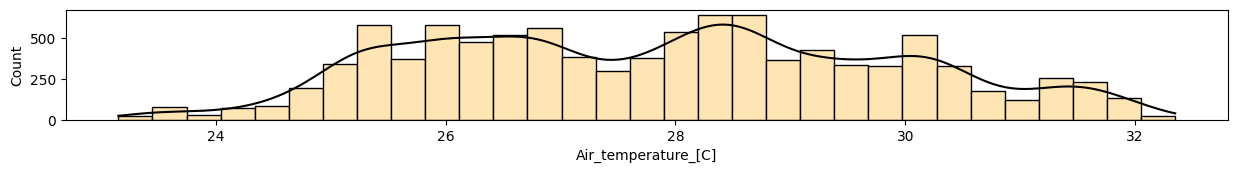

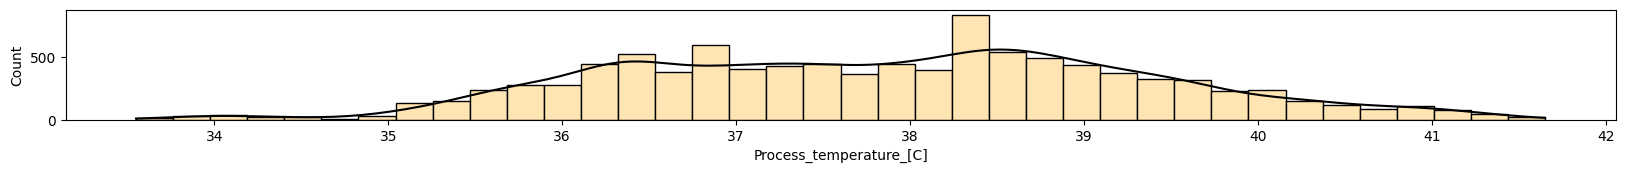

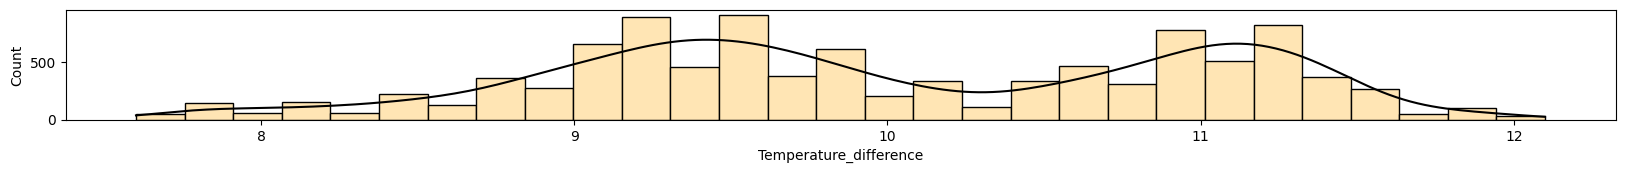

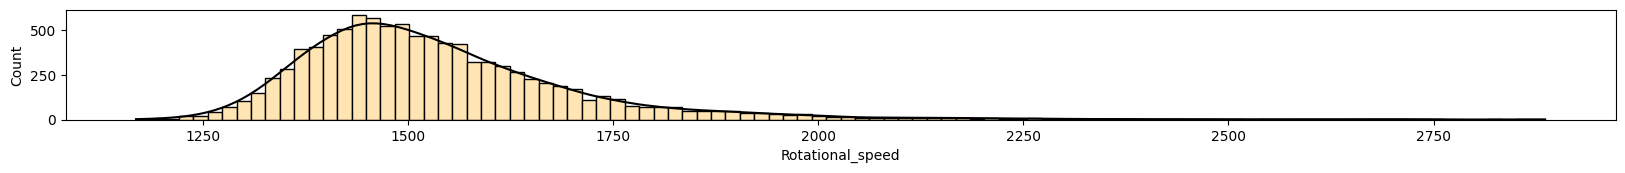

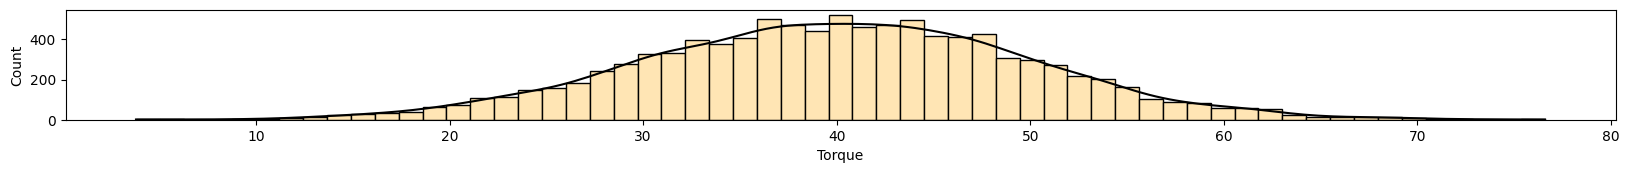

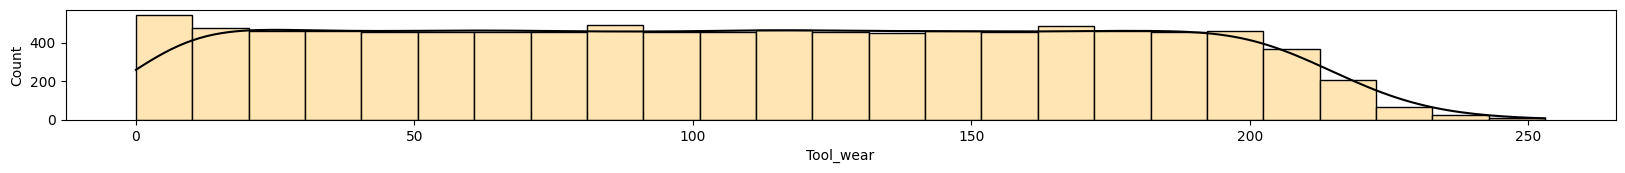

In [20]:
plt.figure(figsize=(15,10))
for index,column in enumerate(['Air_temperature_[C]','Process_temperature_[C]','Temperature_difference','Rotational_speed','Torque','Tool_wear']):
    plt.subplot(6,1,1+index)
    sns.histplot(data=df4,x=column,kde=True,color='black',facecolor='#FFE5B4')
    plt.xticks
    plt.show()

<Figure size 2000x2000 with 0 Axes>

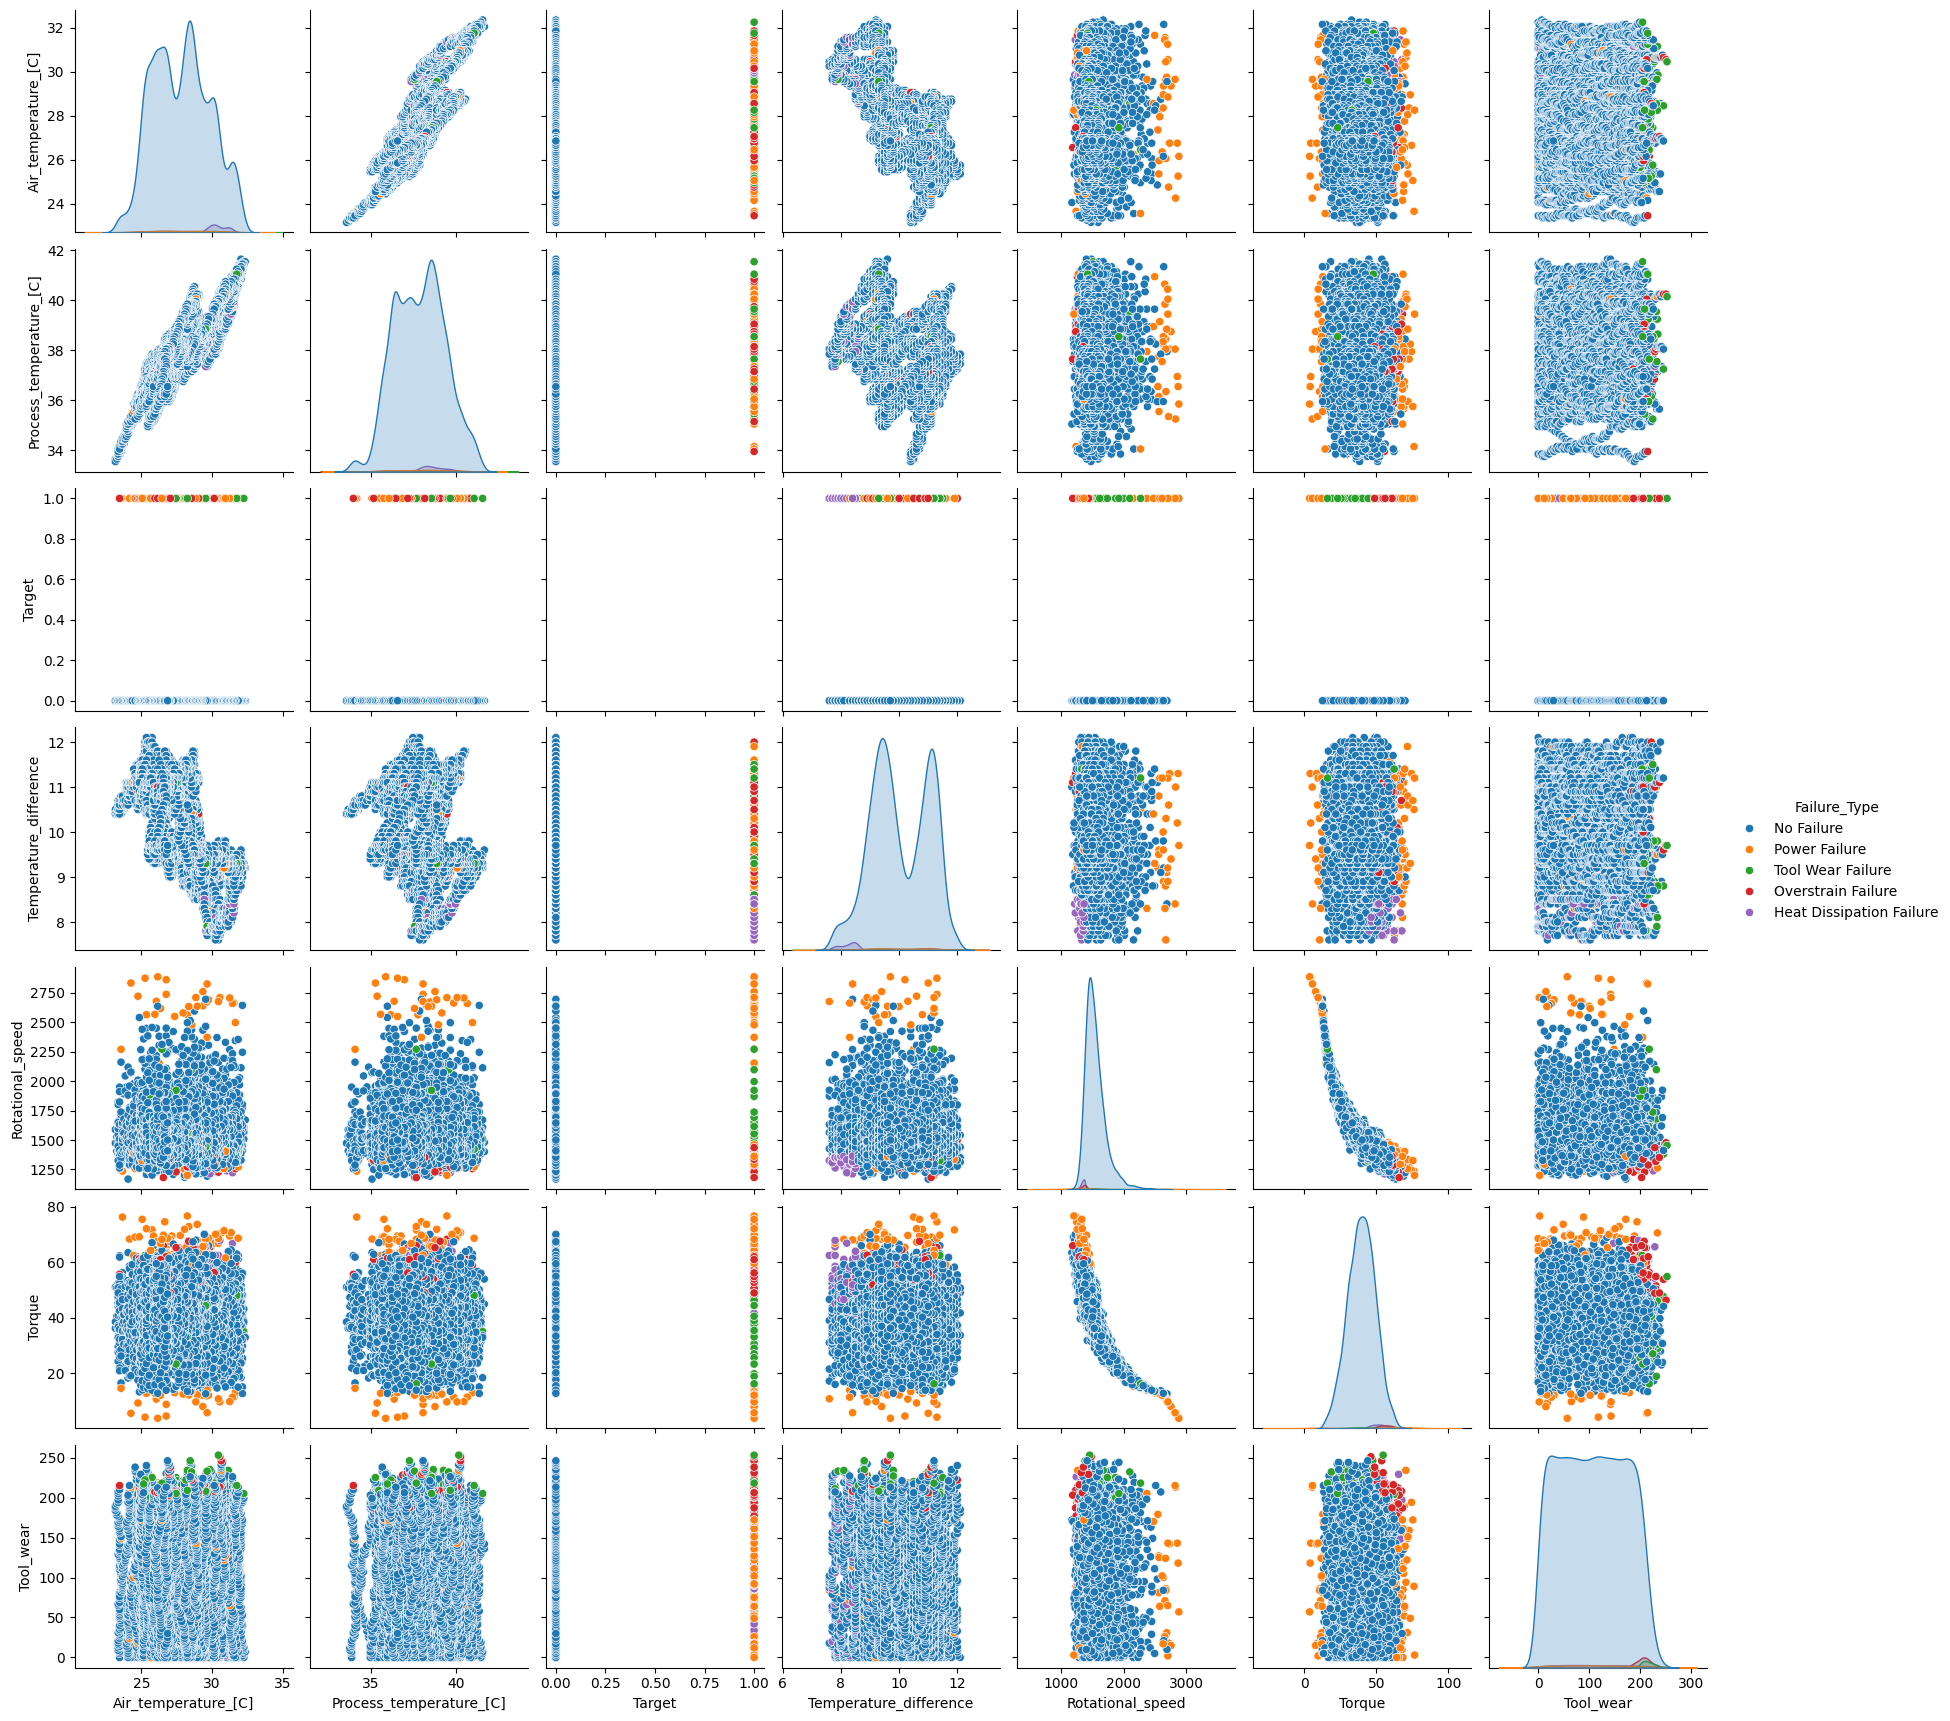

In [21]:
plt.figure(figsize=(20,20))
pair=sns.pairplot(data=df4,hue='Failure_Type')
plt.show()

<Axes: xlabel='Torque', ylabel='Rotational_speed'>

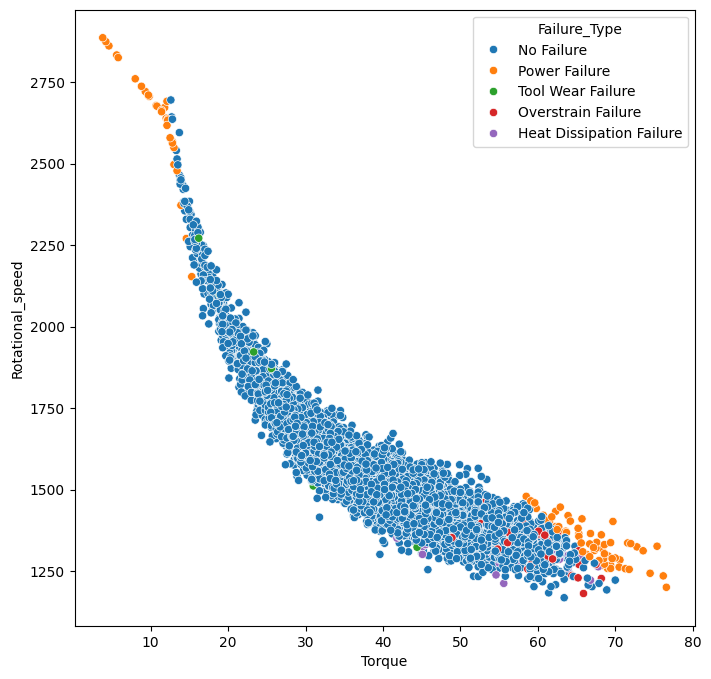

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df4,x='Torque',y='Rotational_speed',hue='Failure_Type')

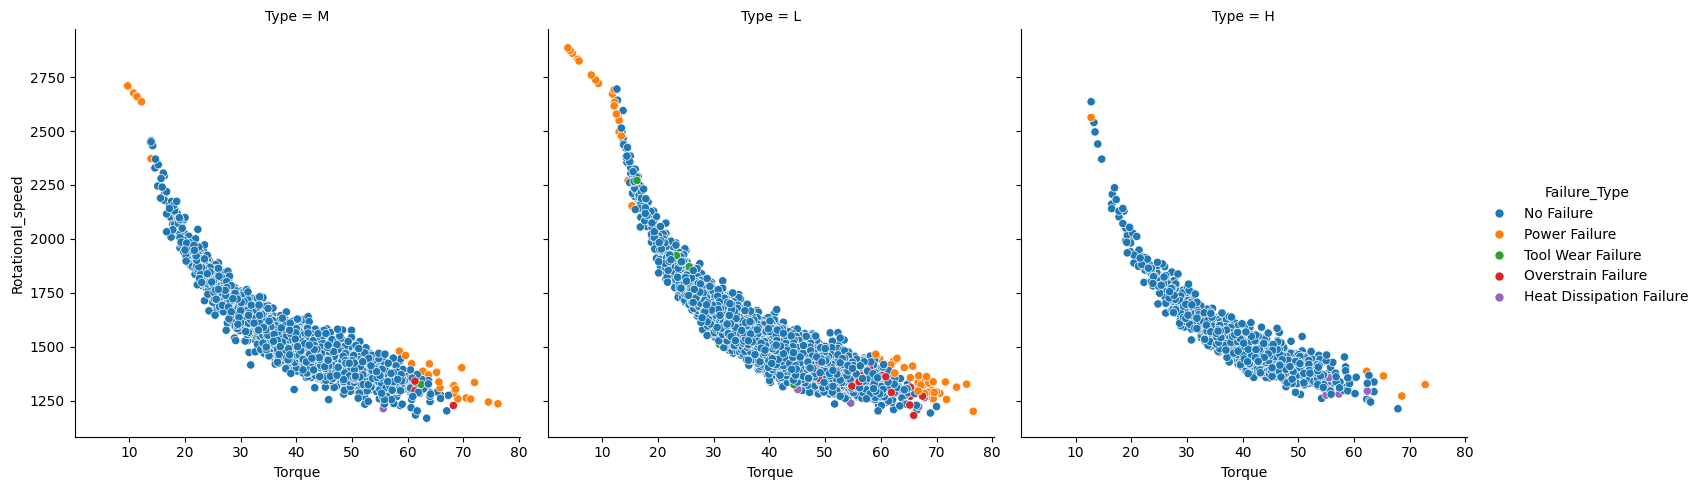

In [23]:
sns.relplot(data=df4,x="Torque",y="Rotational_speed",col='Type',hue='Failure_Type')
plt.show()

In [24]:
#corr=df4.corr()
#sns.heatmap(corr,annot=True)

In [25]:
encoder=ce.OrdinalEncoder(cols=['Type','Failure_Type'])
df5=encoder.fit_transform(df4)
scaler=LabelEncoder()
df5['Failure_Type']=scaler.fit_transform(df5['Failure_Type'])
df5.head()

,Type,Air_temperature_[C],Process_temperature_[C],Target,Failure_Type,Temperature_difference,Rotational_speed,Torque,Tool_wear
0,1,25.95,36.45,0,0,10.5,1551,42.8,0
1,2,26.05,36.55,0,0,10.5,1408,46.3,3
2,2,25.95,36.35,0,0,10.4,1498,49.4,5
3,2,26.05,36.45,0,0,10.4,1433,39.5,7
4,2,26.05,36.55,0,0,10.5,1408,40.0,9


<Axes: >

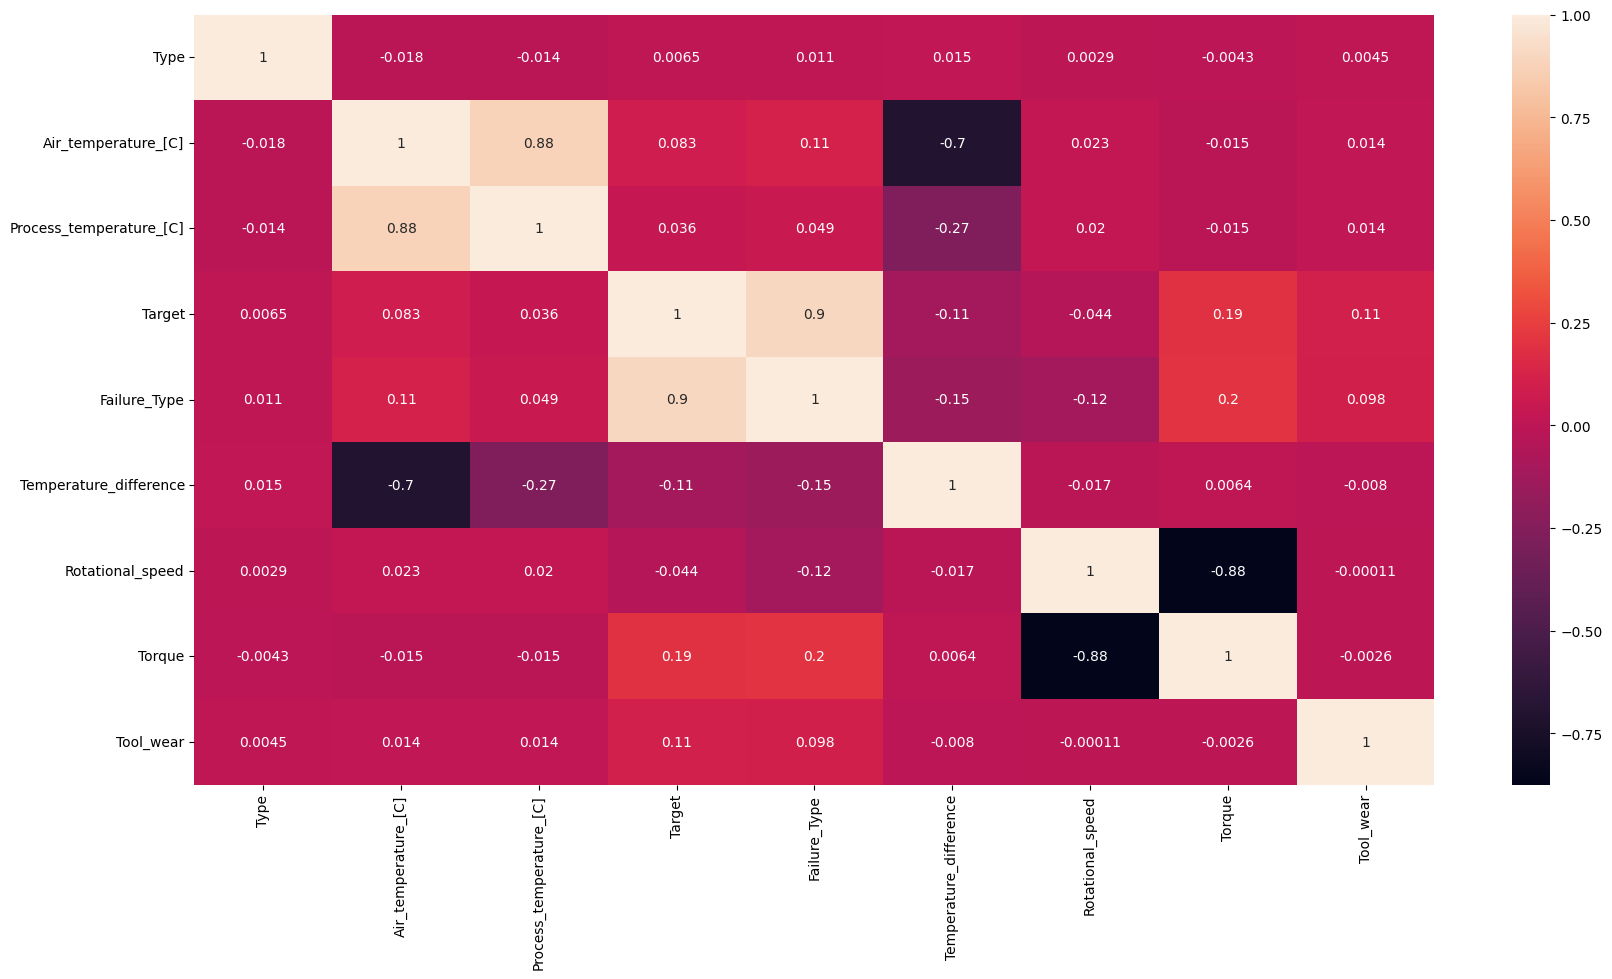

In [26]:
corr=df5.corr()
sns.heatmap(corr,annot=True)

In [27]:
df5=df5.drop(columns=['Target'],axis=1)

In [28]:
df5.head()

,Type,Air_temperature_[C],Process_temperature_[C],Failure_Type,Temperature_difference,Rotational_speed,Torque,Tool_wear
0,1,25.95,36.45,0,10.5,1551,42.8,0
1,2,26.05,36.55,0,10.5,1408,46.3,3
2,2,25.95,36.35,0,10.4,1498,49.4,5
3,2,26.05,36.45,0,10.4,1433,39.5,7
4,2,26.05,36.55,0,10.5,1408,40.0,9


In [29]:
x=df5.drop(['Failure_Type'],axis=1)
x.head()

,Type,Air_temperature_[C],Process_temperature_[C],Temperature_difference,Rotational_speed,Torque,Tool_wear
0,1,25.95,36.45,10.5,1551,42.8,0
1,2,26.05,36.55,10.5,1408,46.3,3
2,2,25.95,36.35,10.4,1498,49.4,5
3,2,26.05,36.45,10.4,1433,39.5,7
4,2,26.05,36.55,10.5,1408,40.0,9


In [30]:
y=df5['Failure_Type']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Failure_Type, dtype: int64

## Model Training

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.linear_model import LinearRegression
lr_clr=LinearRegression()
lr_clr.fit(x_train,y_train)
lr_clr.score(x_test,y_test)

0.07484530095574238

In [33]:
## Linear Regression not gonna work

In [34]:
from sklearn.linear_model import LogisticRegression
lr_clr=LogisticRegression()
lr_clr.fit(x_train,y_train)
lr_clr.score(x_test,y_test)

C:\Users\deyab\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9694235588972431

In [35]:
# Logistic is though good lets find the best

In [38]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier()
Tree.fit(x_train,y_train)
Tree.score(x_test,y_test)

0.9834586466165414

In [41]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(n_estimators=80)
Forest.fit(x_train,y_train)
Forest.score(x_test,y_test)

0.9894736842105263

In [42]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.9694235588972431

## Best model= Random Forest classifier with an accuracy of 0.98947

## PREDICTION

In [82]:
def predict_failure(Type,Air_temperature,Process_temperature,Temperature_difference,Rotational_speed,Torque,Tool_wear):
    if (Type=='M'):
        Types=1
    if (Type=='L'):
        Types=2
    if (Type=='M'):
        Types=3
    X=np.zeros(len(x.columns)-2)
    X[0]=Types
    X[1]=Air_temperature
    X[2]=Process_temperature
    X[3]=Temperature_difference
    X[4]=Rotational_speed
    x[5]=Torque
    x[6]=Tool_wear
    if (Forest.predict([X])[0]==0):
        return "No Failure"
    return "Failure"


In [83]:
predict_failure('M',26.05,36.55,10.5,1408,46.3,3)

C:\Users\deyab\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'No Failure'